<center>
    <h1> MSIN0221 Natural Language Processing </h1>
    <h2> Gaining an Insight on Public Sentiment Regarding the COVID-19 Vaccinations </h2>
    <h3> Group 7 </h3>
</center>

## Table of Content<br><br>

*`1. Introduction`*<br>
- 1.1. [Project Overeview](#Project_Overview)<br>
- 1.2. [Library Imports](#Library_Imports)<br>
- 1.3. [Data Gathering](#Data_Gathering)<br>
- 1.4. [Loading Labeled Data](#Loading_Labeled_Data)<br>
- 1.5. [Data Cleaning](#Data_Cleaning)<br>


*`2. Methods`*<br>
- 2.1. [Data Transformation](#Data_Transformation)<br>
- 2.2. [Split Into Train, Dev and Test](#Split_Into_Train_,_Dev_and_Test)<br>
- 2.3. [Familiarization with the Data](#Familiarization_with_the_Data)<br>
- 2.4. [Finding Top Pronouns and Verbs](#Finding_Top_Pronouns_and_Verbs)<br>

*`3. Data Visualizations`*<br>
- 3.1. [Exploring the Raw Data](#Exploring_the_Raw_Data)<br>
- 3.2. [Top 50 Tokens](#Top_50_Tokens)<br>
- 3.3. [Top Vocabulary for Science SubReddit](#Top_Vocabulary_for_Science_SubReddit)<br>
- 3.4. [Most Frequent Words for the Science SubReddit](#Most_Frequent_Words_for_the_Science_SubReddit)<br>
- 3.5. [Most Frequent Words for the Conspiracy SubReddit](#Most_Frequent_Words_for_the_Conspiracy_SubReddit)<br>
- 3.6. [Most Frequent Words for the WorldNews SubReddit](#Most_Frequent_Words_for_the_WorldNews_SubReddit)<br>
- 3.7. [Most Frequent Words for the Vaccine SubReddit](#Most_Frequent_Words_for_the_Vaccine_SubReddit)<br>

*`4. Exploration of Different Models`*<br>
- 4.1. [Manual Feature Engineering](#Manual_Feature_Engineering)<br>
- 4.2. [Manual Logistic Regression Model](#Manual_Logistic_Regression_Model)<br>
- 4.3. [Vectorised Logistic Regression](#Vectorised_Logistic_Regression)<br>
- 4.4. [NLTK VADER Sentiment Analyzer](#NLTK_VADER_Sentiment_Analyzer)<br>
- 4.5. [TFIDF Character N-Grams + Logistic Regression](#TFIDF_Character_N-Grams_+_Logistic_Regression)<br>
- 4.6. [TFIDF + Random Forest Classifier](#TFIDF_+_Random_Forest_Classifier)<br>
- 4.7. [BI-LSTM Sentiment Classification](#BI-LSTM_Sentiment_Classification)<br>
- 4.8. [BERT Sentiment Analyzer](#BERT_Sentiment_Analyzer)<br>
- 4.9. [Training a Convolutional Neural Network](#Training_a_Convolutional_Neural_Network)<br>

*`5. Error Analysis`*<br>
- 5.1. [Confusion Matrixes](#Confusion_Matrixes)<br>
- 5.2. [F1-Scores](#F1-Scores)<br>
- 5.3. [Text Analysis](#Text_Analysis)<br>

*`6. Conclusion`*<br>
- 6.1. [Limitations](#Limitations)<br>
- 6.2. [Conclusion](#Conclusion)<br>
- 6.3. [References](#References)<br>

## 1. Introduction
### 1.1. Project Overview
<a id="Project_Overview"></a>

As the majority of populations in countries around the world turn to online networks as a medium for information, individuals have the power to efficiently create and proliferate ideas at scale. Thus, sentiment analysis is now a vital tool for capturing public opinion about political trends, socio-economic and societal changes. News corporations monitor political trends and now governments and the healthcare industry need to monitor attitudes towards medical innovation.






 In the fightback against the COVID-19 pandemic, vaccination programmes worldwide are beginning. The UK Government, which is well underway in its vaccination programme, will define a successful vaccination campaign if uptake reaches 75% of the population. In care homes and over 75’s, the uptake has been at 90%. However, as we move through the population, they see BAME communities and healthcare workers experience lower uptakes (Department of Health & Social Care, 2021). A study by the BMJ outlined that an NHS trust in England noted Black Caribbean/African and Bangladeshi/Pakistani healthcare workers were half as likely to take a vaccine as their other ethnic counterparts (Razai, Osama, McKechnie, and Majeed, 2021). In Europe, the picture is more worrisome, with online anti-vaccination sentiment promoting the idea that the vaccine isn’t safe and that immunisation is part of a broader business strategy (Porreca, Scozzari, and Di Nicola, 2020).
Our project aimed to investigate the lively discussions on the popular online network Reddit, concerning vaccine sentiment specifically. By scraping live comments from Reddit subforums related to posts concerning COVID-19 vaccines, we were able to begin constructing preliminary models that could serve as a baseline for sentiment analysis of vaccines online. The data, obtained using Python’s Wrapper Reddit API:Praw, will consist of comments taken from posts within the following subreddit forums;
- r/Vaccine Questions 
- r/science
- r/Worldnews
- r/conspiracy





The data was labelled manually by the four members of the group, cross-checked to induce the baseline human accuracy score, and cleaned before exploration. The cleaned data was then employed as training, validation, and test data for the preliminary models used in this project. The models included; Manually Feature engineered logistic regression, Vectorised Logistic regression using CountVectorizer(), NLTK VADER sentiment analyzer, TFIDF Logistic Regression, and Random Forest classifier, BI-LSTM Sentiment Classifier, BERT Sentiment Analyser and a Convolutional Neural Network.  






There is precedent for studying public perception of vaccines using sentiment analysis. In a paper published by Reghupathi, et al. in 2020, natural language processing was used to explore sentiment trends on vaccinations on the social media platform Twitter (US National Library of Medicine National Institutes of Health, 2021). Over four months in 2019, as the vaccination debate took place in the United States, Reghupathi et al. scraped over 9581 tweets with the keyword “vaccine” globally from the site (US National Library of Medicine National Institutes of Health, 2021). The NLTK and the sentiment reasoner VADER analysed each sentence and determined a sentiment score based on whether it conveys a positive, negative or neutral sentiment (US National Library of Medicine National Institutes of Health, 2021). The results highlighted that over half the tweets analysed in the sample expressed negative sentiment towards vaccination, highlighting the scale of opinion online(US National Library of Medicine National Institutes of Health, 2021).
However, unlike Twitter and Facebook, Reddit posts and subforums are less regulated than other social media platforms. For this project's purposes, we can see more representative insight into opinion on vaccines. Furthermore, previous studies have used Reddit posts as training data for well-known NLP models (Kerrigan, Slack, and Tuyls, 2020). Work by Kerrigan, G.et.al 2020 demonstrated how OpenAI's pre-trained GPT-2 was fine-tuned on a Reddit components data set of 10,000 comments. (Kerrigan, Slack, and Tuyls, 2020).


### Methodology 







**1. Data Gathering**
As aforementioned, the data was gathered using Pythons Reddit API:PRAW. A reddit API account was created to access the site.  Queries were run through the API, with each query specified so that the posts identified in each subreddit would contain one of the following key words:’"covid vaccine", "vaccine", "coronavirus vaccine", "vaccine scam", "vaxxer". These key words were consistent for each query across the four subreddits included in the data gathering process. The query returned the first 250 comments of the most most relevant to our search requirements, in total returning 1000 comments from four subreddits.  





**2. Labelling**
Each of the four team members labelled 250 comments each in relation to their perceived sentiment as -1 (negative), 0 (neutral) or 1 (positive). Labelling was done manually in excel. Once the first 250 comments were labelled, the labelling was cross checked so each member label checked another member’s labelling. The label check and first round labels were compared and the accuracy score from this cross referencing formed the Human baseline accuracy for sentiment analysis on these reddit comments. 

**3. Data Cleaning**

Data was loaded, and due to the nature of the text required extensive cleaning. For NLTK and the vectorized models we won’t be employing this cleaned data, however it is necessary for our manually featured baseline model, LI-STM, BERT and Convolutional neural network. Functions were coded to carry out each cleaning task.

Data was cleaned by removing:
- Upper case lexicon
- Html functions
- Punctuation
- Stopwords
- The text was tokenized and lemmatized in addition and saved as a clean data pack. 
- Following this, the data was split into train, validation and test sets. This was done frequently throughout the project to ensure the correct - data was given to each model to be trained upon. 

**4. Modelling**

Our modelling was based on the pursuit of suitable baseline models for further sentiment analysis on reddit comments and subreddits.

- **Manual Feature Engineered Logistic Regression**
To prepare our training data for this model, we created features that would manually engineer the text. Functions were created to quantify sentence length, positivity score using a preloaded library of positive and negative words, the subreddit that the text was scraped from, number of adjectives, number of nouns and the number of characters. The model was trained and its accuracy score generated based on predictions from our validation set. 


- **Count vectorized Logistic regression**
The training data for this was not manually engineered, instead it was vectorised using count vectorizer(). This model uses hashing to find a token string and attach it to an integer index. This method is easily scalable and requires low memory. The model was trained and its accuracy score generated based on predictions from our validation set. 


- **NLTK VADER Sentiment Analyser**
NLTK is a model, that is pre-trained on social media data that is able to assign polarity to words and estimate the positive, neutral and negative sentiment of the text as an average. It is a rules based model, and due to its training regime is effective at estimating the sentiment of social media data. The data used for this model is taken from the original data import and thus isn't cleaned as NLTK is case, punctuation and special symbol sensitive. It’s accuracy score is generated based on predictions from our validation set. 

- **TFDIF Vectorizer with Logistic Regression and Random Forest**
TFDIF uses a vectorizer function to quantify text to integer form, like the CountVectorizer(). However TFDIF vectorizer carries out this function for each word by comparing the number of times a word appears in a data set  with the number of times a word appears in a sentence. This weights words by their originality. The model again is quick, requiring low memory. Both a Random Forest with GridSearch and Logistic Regression were conducted. 

- **BI-LSTM Sentiment Classifier**
We fit out first neural network with our training data and embedded our data using a pre trained word2vec model. The neural network was fit using bidirectional LSTM layers. Hidden layers were induced using Tensorflow and Keras. It’s accuracy score is generated based on predictions from our validation set. 

- **BERT Sentiment Analyzer**
We employed the pretrained and state of the art machine learning model, BERT. We employed the base pre-trained general BERT model variation with its 12 layers and 110 million parameters. We employed the ‘ktrain’ library to wrap and debug our model. 


- **Convolutional Neural Network**
Our final model was a Convolutional Neural Network  and then the same Neural network fine tuned using pre trained word embedding. A sigmoid output layer was coded as an output layer, to determine the probability of a sentence being positive or negative. 


### 1.2. Library Imports
<a id="Library_Imports"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup
import string
import sys
import os
import numpy as np
!pip install spacy             # install stuff
import spacy
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    import spacy.cli 
    print("Model not found. Downloading.")
    spacy.cli.download("en_core_web_md")
    import en_core_web_md
    nlp = en_core_web_md.load()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 50



import tensorflow
tensorflow.__version__
!pip install keras 
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.python import keras
import tensorflow
from keras.backend import clear_session
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
import re
!pip install yellowbrick
import yellowbrick
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense

import random
random.seed(1)


!pip install gensim
from gensim.models import Word2Vec
!pip install flair
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, ELMoEmbeddings, TransformerWordEmbeddings, TransformerDocumentEmbeddings


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup
import string
import sys
import os

!pip install spacy             # install key modules
import spacy
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    import spacy.cli 
    print("Model not found. Downloading.")
    spacy.cli.download("en_core_web_md")
    import en_core_web_md
    nlp = en_core_web_md.load()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1.3. Data Gathering
<a id="Data_Gathering"></a>

In [3]:
# Importing PRAW and Pandas
#  PRAW (Python Reddit Access API )

# import praw
# import pandas as pd

In [4]:
# Credentials 

# personal_use_script = "hfCKtodFPipsFg" # clent_id also app_id
# secret_key = "Kd4bNd_YokXjSngUzg0Vf6Bq0WMA5A" # client_secret
# app_name = "Juan"

# username = "Over-Sky-6049"

In [5]:
# 1.) Establishing a Connection

# Establishes the connection and 
# reddit = praw.Reddit(user_agent='Comment Extraction (by /u/Over-Sky-6049)',
#                      client_id='CwTM2wqT8j3ABA',
#                      client_secret="UFBFps0O3BIWjbaiSLi6-f8Gejkwqg",
#                      username='Dante_Chia_2021', 
#                      password='Data2021!')

In [6]:
# sub = ['vaxxhappened']  # make a list of subreddits you want to scrape the data from

# for s in sub:
    
#     subreddit = reddit.subreddit(s)   # Chosing the subreddit

We chose to focus on 4 different subreddits to get as diverese pool of opinions as possible. First two subreddits were r/science and r/worldnews which should provide an audience that believes in scientifical facts and is up to date on global news in regards to COVID-19 vaccinations. The other two subreddits were r/vaccine and r/conspiracy where we wanted to capture the opinions of other groups of people to ensure no information biases.

In [7]:
# ###################################################################################
# ####CREATING DICTIONARY TO STORE THE DATA WHICH WILL BE CONVERTED TO A DATAFRAME###
# ###################################################################################

# #   NOTE: ALL THE POST DATA AND COMMENT DATA WILL BE SAVED IN TWO DIFFERENT
# #   DATASETS AND LATER CAN BE MAPPED USING IDS OF POSTS/COMMENTS AS WE WILL 
# #   BE CAPTURING ALL IDS THAT COME IN OUR WAY

# # SCRAPING CAN BE DONE VIA VARIOUS STRATEGIES {HOT,TOP,etc} we will go with keyword strategy i.e using search a keyword
# query = ["Covid19", "COVID-19", "COVID", "covid vaccine"]

# for item in query:
#     post_dict = {
#         "title" : [],   #title of the post
#         "score" : [],   # score of the post
#         "id" : [],      # unique id of the post
#         "url" : [],     #url of the post
#         "comms_num": [],   #the number of comments on the post
#         "created" : [],  #timestamp of the post
#         "body" : []         # the descriptionof post
#         }
#     comments_dict = {
#         "comment_id" : [],      #unique comm id
#         "comment_parent_id" : [],   # comment parent id
#         "comment_body" : [],   # text in comment
#         "comment_link_id" : []  #link to the comment
#         }
# for submission in subreddit.search(query,sort = "top",limit = 1):
#     post_dict["title"].append(submission.title)
#     post_dict["score"].append(submission.title)
#     post_dict["id"].append(submission.title)
#     post_dict["url"].append(submission.title)
#     post_dict["comms_num"].append(submission.title)
#     post_dict["created"].append(submission.title)
#     post_dict["body"].append(submission.title)
            
#             ##### Acessing comments on the post
# submission.comments.replace_more(limit = 1)

# for comment in submission.comments.list():
#     comments_dict["comment_id"].append(comment.id)
#     comments_dict["comment_parent_id"].append(comment.parent_id)
#     comments_dict["comment_body"].append(comment.body)
#     comments_dict["comment_link_id"].append(comment.link_id)
        
# post_comments = pd.DataFrame(comments_dict)

# post_comments.to_csv(s+"_comment_"+ item +"subreddit.csv")
# post_data = pd.DataFrame(post_dict)
# post_data.to_csv(s+"gamestop"+ item +"subreddit.csv")

In [8]:
# pd.options.display.max_columns = None
# post_data.T

In [9]:
# post_data["title"]

After running the data scraping code we were able to get about 1,000 rows of comments from the four chosen subreddits.

### 1.4. Loading Labeled Data
<a id="Loading_Labeled_Data"></a>

To gather the historical data on Reddit, we use the Pushshift API. The data are separated by subreddit and store in csv files.

- conspiracy_labeled.csv
- Questions_Vaccine_Labelled.csv
- science_comments_Labelled.csv
- worldnews_Labelled.csv

The files contain the post id, comments, topic, true label and human label.

In [432]:
data_list = ['/project/Report Relevant/CSV scraped Comments/conspiracy_labeled.csv', '/project/Report Relevant/CSV scraped Comments/Questions_Vaccine_Labelled.csv', '/project/Report Relevant/CSV scraped Comments/science_comments_Labelled.csv', '/project/Report Relevant/CSV scraped Comments/worldnews_Labelled.csv']


In [433]:
def load_data(data_list:list):
    df_all = pd.DataFrame()
    for file in data_list:
        new_rows = pd.read_csv(file,index_col=0)
        print('Adding rows from \'{}\'...'.format(file))
        if new_rows.isna().any().any():
            for col in new_rows.columns[new_rows.isna().any()]:
                  new_rows.fillna(method = 'ffill',inplace=True)
        print(new_rows.isna().any())
        df_all = pd.concat([df_all,new_rows[['comment_body','Topic','Label','Label Check']]],ignore_index=True)
    return df_all

In [434]:
data = load_data(data_list)

Adding rows from '/project/Report Relevant/CSV scraped Comments/conspiracy_labeled.csv'...
comment_id           False
comment_parent_id    False
comment_body         False
comment_link_id      False
Label                False
Label Check          False
Topic                False
dtype: bool
Adding rows from '/project/Report Relevant/CSV scraped Comments/Questions_Vaccine_Labelled.csv'...
comment_id           False
comment_parent_id    False
comment_body         False
comment_link_id      False
Topic                False
Label                False
Label Check          False
dtype: bool
Adding rows from '/project/Report Relevant/CSV scraped Comments/science_comments_Labelled.csv'...
Unnamed: 0.1         False
comment_id           False
comment_parent_id    False
comment_body         False
comment_link_id      False
Label                False
Label Check          False
Topic                False
dtype: bool
Adding rows from '/project/Report Relevant/CSV scraped Comments/worldnews_Labelled

In [435]:
data.isna().any()

comment_body    False
Topic           False
Label           False
Label Check     False
dtype: bool

We manually labeled each comment to be able to vertify human's judgment to the machine. We also created a 'Label Check' where another human went and labeled the same data. We found that human label check accuracy is around 70%.

### 1.5. Data Cleaning
<a id="Data_Cleaning"></a>

Since some of the comments are deleted or removed, we have to drop those rows from our dataset. The following code drops the rows with comments which are either `[deleted]` or `[removed]`.

In [436]:
data.drop(data[data['comment_body'].apply(lambda s: s == '[deleted]')].index,inplace=True)
data[data['comment_body'].apply(lambda s: 'deleted' in s)]
data.drop(data[data['comment_body'].apply(lambda s: s == '[removed]')].index,inplace=True)
data[data['comment_body'].apply(lambda s: 'removed' in s)]

,comment_body,Topic,Label,Label Check
7,Every time i post this it gets deleted off red...,conspiracy,0,0
23,GET YOUR SCREENSHOTS AND PROOFS. I have a feel...,conspiracy,0,0
132,You can start by not trusting this post. \n\nT...,conspiracy,1,1
178,“4. Online commentators should be skillful ...,conspiracy,0,0


,comment_body,Topic,Label,Label Check
38,I didn’t realize you could actually engineer a...,conspiracy,0,0
97,Good post. It will be removed. Good info tho...,conspiracy,0,0


In [437]:
data.head()

,comment_body,Topic,Label,Label Check
0,I don’t know what to believe in this world......,conspiracy,0,0
1,"> In this study, a human immunodeficiency viru...",conspiracy,0,0
2,"Hey redditors, channel 4 learned this years ag...",conspiracy,0,0
3,"I wouldn’t put it passed China, but if they DI...",conspiracy,1,1
4,There are a lot of shills for China. Can’t say...,conspiracy,0,1


The true data labels are evenly ditributed across Positive and Negative sentiments.

In [438]:
data['Label'].value_counts(normalize=True)

0    0.559471
1    0.440529
Name: Label, dtype: float64

No handles with labels found to put in legend.


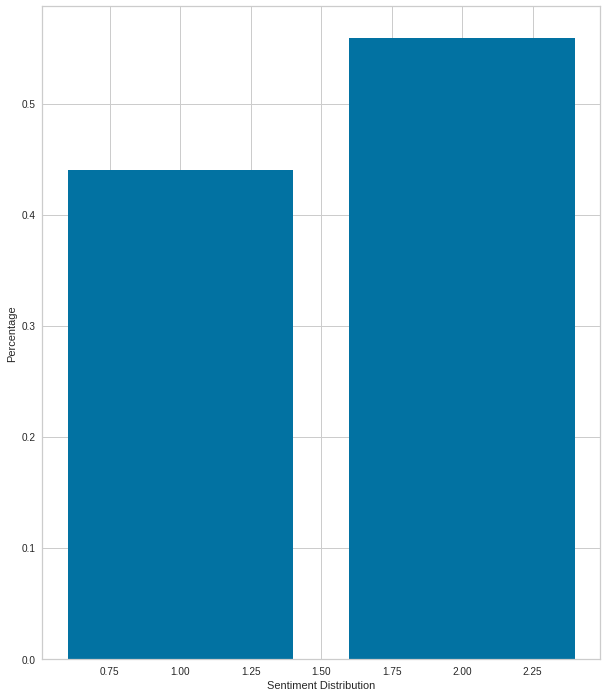

In [439]:
# Positives and Negatives

positive = 0.440529
negative = 0.559471

# Plotting the Bar Charts
y = [positive, negative]
x = [1,2]
plt.bar(x, y)
plt.legend()
plt.xlabel('Sentiment Distribution')
plt.ylabel('Percentage')
plt.show();

The human manual labels are also evenly ditributed across Positive and Negative sentiments.

In [440]:
data['Label Check'].value_counts(normalize=True)

0    0.515419
1    0.484581
Name: Label Check, dtype: float64

The following code calculates the accuracy score of human manual labels. The accuracy is 83%.

In [441]:
accuracy_score(data['Label'],data['Label Check'])

0.8303964757709251

## 2. Methods
### 2.1. Data Transformation
<a id="Data_Transformation"></a>

First we define our transformation functions. However, the transformation process will be different for each model type. As a result we create a new data frame for each model.

In [442]:
def lower(text):
    return text.lower()

def remove_html(text):
    soup = BeautifulSoup(text,'lxml')
    html_free = soup.get_text()
    return html_free

def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

def tokenisation(text):
    tokenizer = RegexpTokenizer('\s+', gaps=True)
    return tokenizer.tokenize(text.lower())

def remove_stopwords(text):
    return [w for w in text if w not in stopwords.words('english')]

def word_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

def word_stemmer(text):
    stemmer = PorterStemmer()
    stem_text = ' '.join([stemmer.stem(i) for i in text])
    return stem_text

def data_cleaning(data,col_name):
    func = [lower,remove_html,remove_punctuation,tokenisation,remove_stopwords,word_lemmatizer]
    for f in func:
        data[col_name] = data[col_name].apply(lambda row: f(row))
    data[col_name] = data[col_name].apply(lambda row: ' '.join(row))
    return data

In [443]:
# Creating a copy of the original data so we can refer to it later
# Applying the cleaning function to the original data
clean_data = data.copy()

In [444]:
data_cleaning(clean_data, 'comment_body')
#clean_data.to_csv('cleaned_data.csv')

,comment_body,Topic,Label,Label Check
0,don’t know believe world want know trust trust...,conspiracy,0,0
1,study human immunodeficiency virus hivbased ps...,conspiracy,0,0
2,hey redditors channel 4 learned year ago archi...,conspiracy,0,0
3,wouldn’t put passed china release virus you’d ...,conspiracy,1,1
4,lot shill china can’t say anything virus cast ...,conspiracy,0,1
...,...,...,...,...
931,haha,wordnews,1,0
932,delicious finally good fucking news,wordnews,1,1
933,yup november big reveal riot season send like ...,wordnews,0,0
934,surveillance virus bat know could done separat...,wordnews,0,1


### 2.2. Split Into Train, Dev and Test
<a id="Split_Into_Train_,_Dev_and_Test"></a>

In [445]:
clean_data.head()

,comment_body,Topic,Label,Label Check
0,don’t know believe world want know trust trust...,conspiracy,0,0
1,study human immunodeficiency virus hivbased ps...,conspiracy,0,0
2,hey redditors channel 4 learned year ago archi...,conspiracy,0,0
3,wouldn’t put passed china release virus you’d ...,conspiracy,1,1
4,lot shill china can’t say anything virus cast ...,conspiracy,0,1


In [446]:
X = clean_data[['comment_body','Topic']]
y = clean_data[["Label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [447]:
X_train = X_train.astype('str')

### 2.3. Familiarization with the Data
<a id="Familiarization_with_the_Data"></a>

In [448]:
# Visualizing the structure of the first sentence from the data
from spacy import displacy
about_interest_text = X_train['comment_body'].iloc[0]
about_interest_doc = nlp(about_interest_text)
displacy.render(about_interest_doc, style='dep', jupyter=True)

### 2.4. Finding Top Pronouns and Verbs
<a id="Finding_Top_Pronouns_and_Verbs"></a>

In [449]:
# Separating the nouns and the adjectives and putting them into a list
nouns = []
adjectives = []

for j in range(len(X_train)):
    body = clean_data['comment_body'].iloc[j]
    complete_doc = nlp(body)    
    # Now finding the adjectives, verbs and others
    for token in complete_doc:
        if token.pos_ == 'NOUN':
            nouns.append(token.text)
        if token.pos_ == 'ADJ':
            adjectives.append(token.text)      


In [450]:
# 1.) Counting the frequency of occurrence of nouns 
nouns_vocab = Counter(nouns)
# 2.) Counting the frequency of occurrence of adjectives
adjectives_vocab = Counter(adjectives)

In [451]:
# Printing the top 10 most common nouns
nouns_vocab.most_common(5)

[('vaccine', 231), ('virus', 105), ('day', 94), ('people', 86), ('effect', 76)]

In [452]:
# Printing the top 10 most common adjectives
adjectives_vocab.most_common(5)

[('first', 48), ('second', 47), ('good', 36), ('moderna', 30), ('dose', 29)]

## 3. Data Visualizations
### 3.1. Exploring the Raw Data
<a id="Exploring_the_Raw_Data"></a>

In [453]:
# Looking at the sentence length per topic

vaccine_questions_sent,science_sent,conspiracy_sent,world_news_sent = [], [], [], []
topics = data['Topic'].unique()

# Creating four lists for the sentence length for each of the topics to analyze later on

for topic in topics:
    x = data.loc[data['Topic']==topic]
    sentences = 0
    for row in range(len(x)):
        doc = nlp(x['comment_body'].iloc[row])
        sentences = sentences + len(list(doc.sents))
    if topic=='conspiracy':
        conspiracy_sent.append(round(sentences/len(x)))
    if topic=='wordnews':
        world_news_sent.append((round(sentences/len(x))))
    if topic=='science':
        science_sent.append((round(sentences/len(x))))
    if topic == 'Vaccine Questions':
        vaccine_questions_sent.append((round(sentences/len(x))))
            

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Average Sentence Length Per Forum')

Text(0, 0.5, 'Sentence Count')

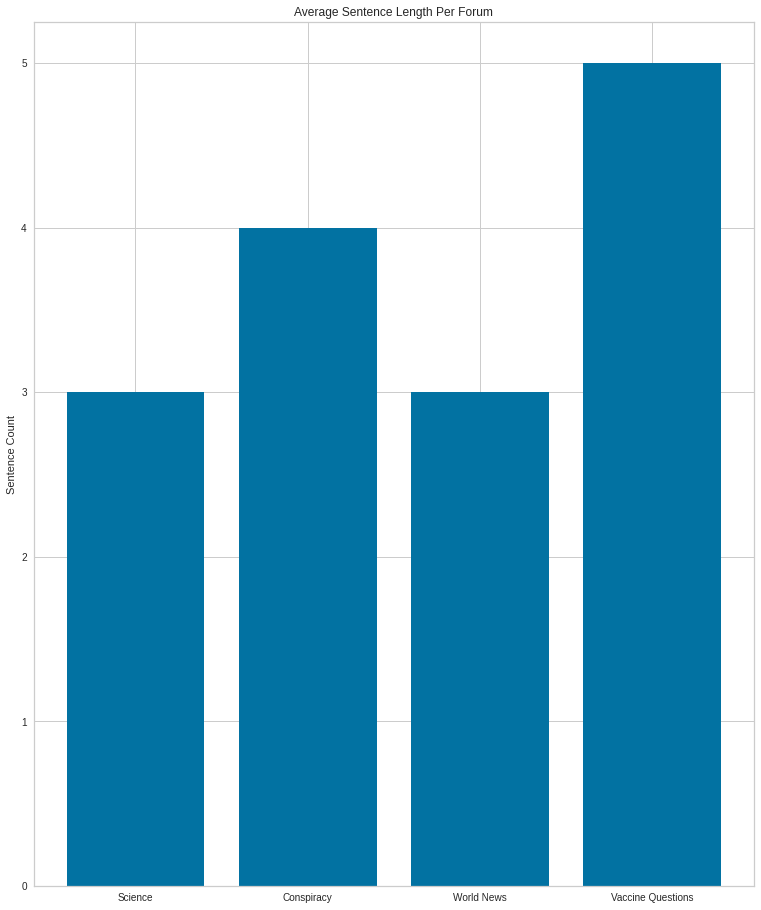

In [454]:
x = science_sent[0], conspiracy_sent[0], world_news_sent[0], vaccine_questions_sent[0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = ['Science', 'Conspiracy', 'World News', 'Vaccine Questions']
students = [23,17,35,29,12]
ax.bar(y,x)
ax.set_title('Average Sentence Length Per Forum')
ax.set_ylabel('Sentence Count')
plt.show()

In [455]:
# Looking at the frequency of occurrance of words per forum type and then for all

science_word_freq = []
conspiracy_word_freq = []
world_news_word_freq = []
vaccine_questions_word_freq = []
all_words = []

# This is based on the clean data

for topic in topics:
    x = X_train.loc[X_train['Topic']==topic]
    sentences = 0
    for row in range(len(x)):
        doc = nlp(x['comment_body'].iloc[row])
        words = [token.text for token in doc if not token.is_stop and not token.is_punct]
        frequency = Counter(words)
        if topic=='conspiracy':
            conspiracy_word_freq.append(frequency)
        if topic=='wordnews':
            world_news_word_freq.append(frequency)
        if topic=='science':
            science_word_freq.append(frequency)
        if topic == 'Vaccine Questions':
            vaccine_questions_word_freq.append(frequency)

In [456]:
# Creating the Bag of Words model 
comm_list = [] 

for row in range(len(X_train)):
    comments = nlp(X_train['comment_body'].iloc[row])
    ready_comm = [token.text for token in comments if not token.is_stop and not token.is_punct]
    comm_list.append(ready_comm)

### 3.2. Top 50 Tokens
<a id="Top_50_Tokens"></a>

In [ ]:
# Creating one single list with all possible words from all the comments

vocabulary = []
for comment in comm_list:
    for word in comment:
        vocabulary.append(word)
        

# Applying the Vectorizer function to the data so it can be plotted        

vectorizer = CountVectorizer(min_df=0, lowercase=False)
docs = vectorizer.fit(vocabulary)
docs2 = vectorizer.fit_transform(vocabulary)
features = vectorizer.get_feature_names()

# Vizualizing the distributions of the data

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs2)
visualizer.show()

### 3.3. Top Vocabulary for Science SubReddit
<a id="Top_Vocabulary_for_Science_SubReddit"></a>

In [330]:
science_vocab = []
conspiracy_vocab = []
vacc_quest_vocab = []
world_news_vocab = []


for topic in topics:
    x = X_train.loc[X_train['Topic']==topic]
    for row in range(len(x)):
        comments = nlp(x['comment_body'].iloc[row])
        ready_comm = [token.text for token in comments if not token.is_stop and not token.is_punct]
        if topic=='conspiracy':
            conspiracy_vocab.append(ready_comm)
        if topic=='wordnews':
            world_news_vocab.append(ready_comm)
        if topic=='science':
            science_vocab.append(ready_comm)
        if topic == 'Vaccine Questions':
            vacc_quest_vocab.append(ready_comm)

individual_topics = [science_vocab, conspiracy_vocab, vacc_quest_vocab, world_news_vocab]
            
science_vocab_final, conspiracy_vocab_final, vacc_quest_vocab_final, world_news_vocab_final = [],[],[],[]

final_vocab_lists = [science_vocab_final, conspiracy_vocab_final, vacc_quest_vocab, world_news_vocab]


for topic in individual_topics:# for each topic
    for comments in topic: # for each comment in the topic
        for word in comments: # for each word in the comment
            
            if topic==conspiracy_vocab: # assign to the correct list
                conspiracy_vocab_final.append(word)
                
            if topic==world_news_vocab:
                world_news_vocab_final.append(word)
                
            if topic==science_vocab:
                science_vocab_final.append(word)
                
            if topic == vacc_quest_vocab:
                vacc_quest_vocab_final.append(word)

### 3.4. Most Frequent Words for the Science SubReddit
<a id="Most_Frequent_Words_for_the_Science_SubReddit"></a>

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cf02d8cd0>,
                    features=['10', '100', '1000', '10000', '108', '1214',
                              '1218', '14', '16', '17', '18', '1823', '19',
                              '195', '1950s', '197', '1b',
                              '1httpswwwthelancetcomjournalslancetarticlepiis0140673620312083fulltexttbl1',
                              '20', '2020', '21', '22', '26', '27', '28',
                              '2httpswwwthelancetcomjournalslancetarticlepiis0140673620312083fulltextsec1',
                              '30', '30somethings', '33', '46', ...],
                    n=None, orient='v')

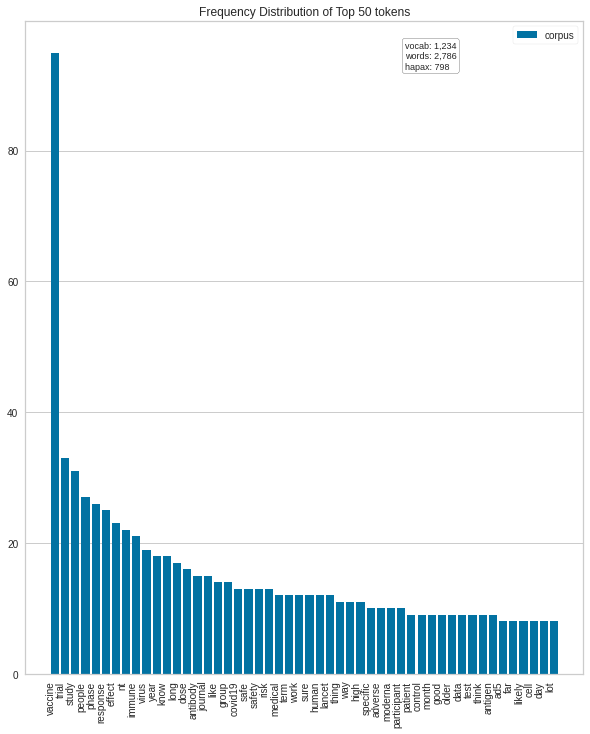

In [331]:
# Applying the Vectorizer function to the data so it can be plotted        
docs = vectorizer.fit(science_vocab_final)
docs2 = vectorizer.fit_transform(science_vocab_final)
features = vectorizer.get_feature_names()
# Vizualizing the distributions of the data
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs2)
visualizer.show()

### 3.5. Most Frequent Words for the Conspiracy SubReddit
<a id="Most_Frequent_Words_for_the_Conspiracy_SubReddit"></a>

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dc1bb75b0>,
                    features=['13h', '19', '1977', '1981', '1984', '2007',
                              '201', '2010', '2016', '2018', '2020', '2021',
                              '47000', '4k', '500000000', '62', 'ability',
                              'able', 'abouthere', 'absolutely', 'academy',
                              'accessed', 'accidentally', 'accuracy',
                              'actively', 'actual', 'actually', 'add', 'added',
                              'admins', ...],
                    n=None, orient='v')

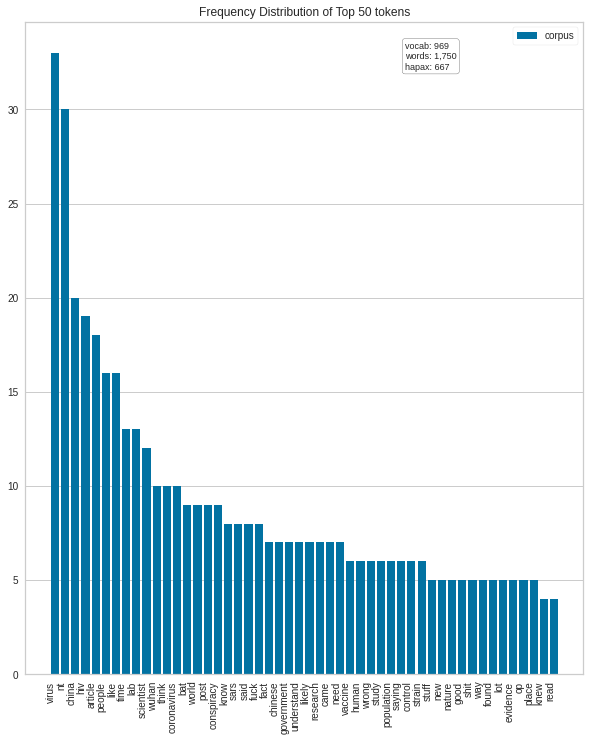

In [332]:
# Applying the Vectorizer function to the data so it can be plotted        
docs = vectorizer.fit(conspiracy_vocab_final)
docs2 = vectorizer.fit_transform(conspiracy_vocab_final)
features = vectorizer.get_feature_names()
# Vizualizing the distributions of the data
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs2)
visualizer.show()

### 3.6. Most Frequent Words for the WorldNews SubReddit
<a id="Most_Frequent_Words_for_the_WorldNews_SubReddit"></a>

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dc1824250>,
                    features=['10', '100', '12', '15', '1614', '17', '20',
                              '2020', '2021', '28', '30', '3028', '3060', '400',
                              '4060', '43500', '4c', '50', '5070', '63', '70',
                              '80', '80c', '812', '90', '94', '95', '9599',
                              '9798', 'able', ...],
                    n=None, orient='v')

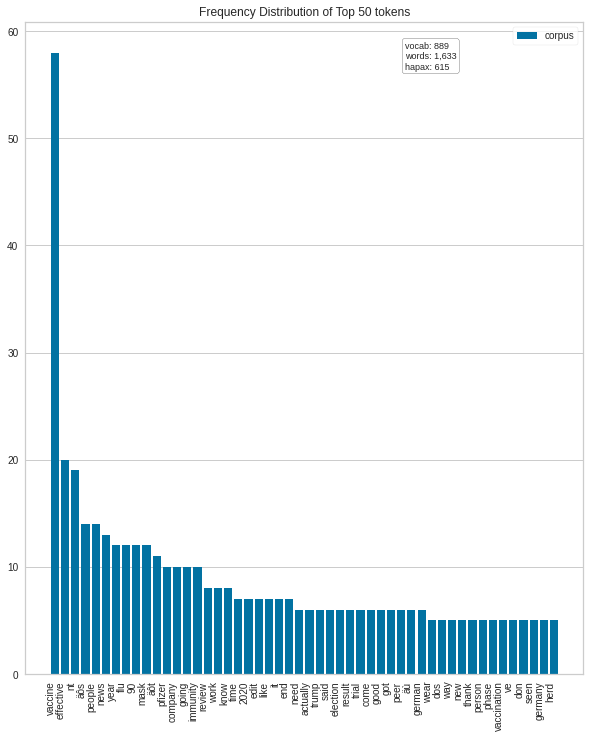

In [333]:
# Applying the Vectorizer function to the data so it can be plotted        
docs = vectorizer.fit(world_news_vocab_final)
docs2 = vectorizer.fit_transform(world_news_vocab_final)
features = vectorizer.get_feature_names()
# Vizualizing the distributions of the data
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs2)
visualizer.show()

### 3.7. Most Frequent Words for the Vaccine SubReddit
<a id="Most_Frequent_Words_for_the_Vaccine_SubReddit"></a>

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e964a1880>,
                    features=['03ml', '10', '100', '1015', '12', '14', '15',
                              '1530', '16', '18', '1824', '18ml', '19', '1990',
                              '1st', '20', '22', '23', '25', '26', '28', '2md',
                              '2nd', '30', '40', '48', '4th', '5060', '60',
                              '612months', ...],
                    n=None, orient='v')

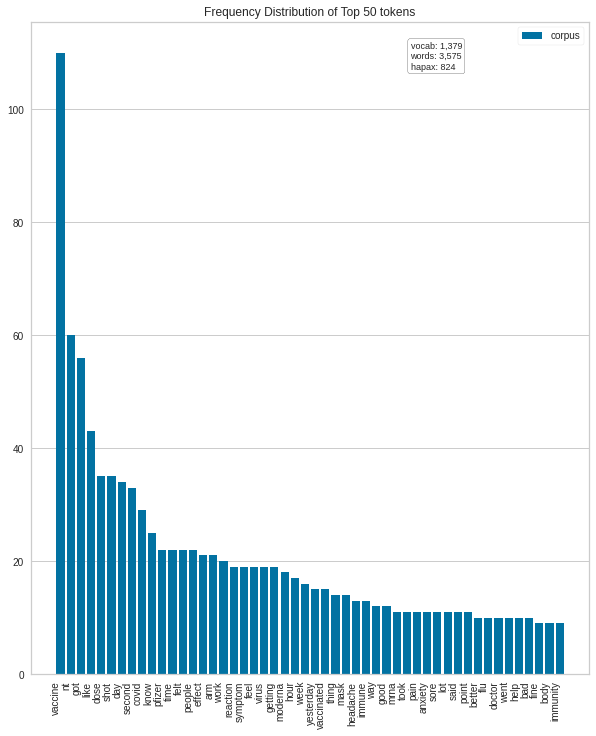

In [334]:
# Applying the Vectorizer function to the data so it can be plotted        
docs = vectorizer.fit(vacc_quest_vocab_final)
docs2 = vectorizer.fit_transform(vacc_quest_vocab_final)
features = vectorizer.get_feature_names()
# Vizualizing the distributions of the data
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs2)
visualizer.show()

## 4. Modeling
### 4.1. Manual Feature Engineering
<a id="Manual_Feature_Engineering"></a>

In [335]:
# Load the opinion lexicon
# Define where the data is located
DATA_DIR = "/project/Report Relevant/CSV scraped Comments"
path_pos_words = os.path.join(DATA_DIR, 'positive-words.txt')
path_neg_words = os.path.join(DATA_DIR, 'negative-words.txt')



# Load in the train and dev data
with open(path_pos_words, 'r', encoding='ISO-8859-1') as f:
    POS_WORDS = set([u''+word.strip()+'' for word in f.readlines()[30:]])
with open(path_neg_words, 'r', encoding='ISO-8859-1') as f:
    NEG_WORDS = set([u''+word.strip()+'' for word in f.readlines()[31:]]) 

print("Loaded {} positive and {} negative words.".format(len(POS_WORDS), len(NEG_WORDS)))
print("Example positive words: {}".format(list(POS_WORDS)[:6]))
print("Example negative words: {}".format(list(NEG_WORDS)[:6]))

Loaded 2006 positive and 4783 negative words.
Example positive words: ['wellbeing', 'eased', 'appreciatively', 'phenomenal', 'glowing', 'maturely']
Example negative words: ['humiliation', 'sucky', 'savage', 'uneconomical', 'calamities', 'dissed']


In [336]:
#sentence length
def sentence_len(tokens):
    return len(tokens.split())

#sentence positivity ... positive and negative words are loaded in cell above
def positivity(tokens):
    score = 0
    for token in tokens.split():
        if token in POS_WORDS:
            score += 1
        if token in NEG_WORDS:
            score -= 1
    return score

#topic type (lambda from pred ind)
def topic(text):
    if text == "science":
        return 1 
    elif text == 'Vaccine Questions':
        return 2 
    elif text == 'conspiracy':
        return 3
    else:
        return 4 

#count for adj/nouns etc !!
#count for agj:
def adj_count(tokens):
    count = 0
    for token in nlp(tokens):
        if token.pos_ == 'ADJ':
            count += 1
    return count

#count for noun
def noun_count(tokens):
    count = 0
    for token in nlp(tokens):
        if token.pos_ == 'NOUN':
            count += 1
    return count

#count for punctuation
def punct_count(tokens):
    count = 0
    for token in nlp(tokens):
        if token.pos_ == 'PUNCT':
            count += 1
    return count

#bag of words/embedding function/ count vectorizer 


#character count
def character_count(token):
    sentence = token.split(" ")
    return  sum(len(word) for word in sentence)/len(sentence)


#featurise
def featurise(text): 
    feature_functions = [sentence_len, positivity, topic, adj_count, noun_count, punct_count, character_count]
    return np.array([fn(text) for fn in feature_functions])  

### 4.2.  Manual Logistic Regression Model
<a id="Manual_Logistic_Regression_Model"></a>

In [337]:
#apply functions
X_train_manual = np.stack(X_train['comment_body'].apply(featurise))
X_train_manual[:10]
y_val_man_logreg = y_val

array([[ 5.        ,  0.        ,  4.        ,  0.        ,  2.        ,
         0.        ,  2.4       ],
       [23.        , -1.        ,  4.        ,  4.        , 11.        ,
         0.        ,  5.17391304],
       [42.        , -2.        ,  4.        ,  2.        , 17.        ,
         4.        ,  5.61904762],
       [13.        ,  1.        ,  4.        ,  2.        ,  6.        ,
         0.        ,  5.46153846],
       [35.        , -4.        ,  4.        ,  7.        , 17.        ,
         0.        ,  5.28571429],
       [35.        ,  2.        ,  4.        ,  4.        , 16.        ,
         0.        ,  5.28571429],
       [34.        ,  1.        ,  4.        , 10.        ,  8.        ,
         0.        ,  4.79411765],
       [17.        , -1.        ,  4.        ,  2.        ,  9.        ,
         2.        ,  5.76470588],
       [72.        , -1.        ,  4.        ,  7.        , 41.        ,
         1.        ,  6.22222222],
       [11.        ,  0.    

In [338]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train_manual,y_train)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [339]:
X_val_manual = np.stack(X_val['comment_body'].apply(featurise))
y_pred_logit = logit.predict(X_val_manual)

In [340]:
accuracy_score(y_val_man_logreg,y_pred_logit)

0.6289308176100629

### 4.3.  Vectorised Logistic Regression
<a id="Vectorised_Logistic_Regression"></a>

In [341]:
# X = clean_data['comment_body']#dirty data as being vectorized 
# y = clean_data["Label"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [342]:
X_train_vector, X_val_vector, X_test_vector = X_train['comment_body'].copy(), X_val['comment_body'].copy(), X_test['comment_body'].copy()
y_train_vector, y_val_vector, y_test_vector = y_train.copy(), y_val.copy(), y_test.copy()

In [343]:
# Creating a Bag Of Words for the training data

vectorizer = CountVectorizer(min_df=0, lowercase=False)

vectorizer.fit(X_train_vector)
X_train_vector = vectorizer.transform(X_train_vector)
X_train_vector = X_train_vector.todense()

X_val_vector = vectorizer.transform(X_val_vector)
X_val_vector = X_val_vector.todense()

X_train_vector

CountVectorizer(lowercase=False, min_df=0)

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [344]:
X_train_vector.shape

(476, 3214)

The sparse matrix indicates there are 3,911 words in the vocabulary and also 484 arrays which coincides with the size of our training set.

In [345]:
# Building a basic/baseline model
classifer = LogisticRegression()
classifer.fit(X_train_vector, y_train_vector)
score = classifer.score(X_val_vector, y_val_vector)

print("Accuracy of baseline model is: ", score)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

Accuracy of baseline model is:  0.6477987421383647


A basic baseline model, is able to predict 57% correctly the outcome of the variables

In [346]:
clear_session()

# Determining the input dimensions that will enter the model
input_dim =  X_train_vector.shape[1] # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Setting the model parameters
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()
                                             

# Setting the layers one by one


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                32150     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________


In [347]:
history = model.fit(X_train_vector, y_train_vector, epochs=100,verbose=False,validation_data=(X_val_vector, y_val_vector), batch_size=10)

In [348]:
tensorflow.convert_to_tensor(y_train)

<tf.Tensor: shape=(476, 1), dtype=int64, numpy=
array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

### 4.4.  NLTK VADER Sentiment Analyzer
<a id="NLTK_VADER_Sentiment_Analyzer"></a>

In [349]:
!pip install nltk


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [350]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [351]:
X_ = clean_data['comment_body']
y_ = clean_data[["Label"]]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [352]:
X_train.head()

y_val_nltk = y_val

817                                     got 1 v 5 defuse
876    like end horror movie theyve exorcised demon e...
190    like said post “fyi you’ll notice lot article ...
473    told u lead paint tephlon frying pan thalidomi...
305    1 coworkers got 1st dose monday next day bos g...
Name: comment_body, dtype: object

In [353]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
y_val_nltk_vader = []
# if probability of positive greater than negative
# then assign positive label else negative label
for x in X_val:
    polarity = analyzer.polarity_scores(x)
    if polarity['pos'] > polarity['neg']:
        y_val_nltk_vader.append(1)
    else:
        y_val_nltk_vader.append(0)

In [354]:
polarity

{'neg': 0.038, 'neu': 0.508, 'pos': 0.455, 'compound': 0.9577}

In [355]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val,y_val_nltk_vader)

0.610062893081761

### 4.5.  TFIDF Character N-Grams + Logistic Regression
<a id="TFIDF_Character_N-Grams_+_Logistic_Regression"></a>

In [356]:
X_ = clean_data['comment_body']
y_ = clean_data[["Label"]]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

t_val_TFIDF_logreg = y_val

In [357]:
from sklearn.feature_extraction.text import TfidfVectorizer

# compute Tf-IDF vectors for character n-grams instead of words

tfidfVectorizer = TfidfVectorizer(min_df = 0,analyzer='char',ngram_range=(1,3))
X_train_vectors = tfidfVectorizer.fit_transform(X_train)
X_val_vectors =  tfidfVectorizer.transform(X_val)

In [358]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
# performing grid search cross validation to find the optimal
# parameters for the LogisticRegression classifier

logistic_classifier = LogisticRegression(max_iter=1000)
param_grid = {'C':[10**-6,10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,100]}
gridSearch = GridSearchCV(logistic_classifier, param_grid,scoring = 'accuracy',cv = 5)
gridSearch.return_train_score = True
gridSearch.fit(X_train_vectors,y_train)

dataframe = pd.DataFrame(gridSearch.cv_results_)
dataframe[['param_C','mean_test_score','mean_train_score']]

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100]},
             return_train_score=True, scoring='accuracy')

,param_C,mean_test_score,mean_train_score
0,1e-06,0.548311,0.548319
1,1e-05,0.548311,0.548319
2,0.0001,0.548311,0.548319
3,0.001,0.548311,0.548319
4,0.01,0.548311,0.548319
5,0.1,0.554627,0.563034
6,1,0.575680,0.836653
7,10,0.569189,0.989494
8,100,0.560811,1.000000


In [359]:
from sklearn.linear_model import LogisticRegression
# parameters which give best cross validation performance  
# 6	1	0.600620	0.791025
# are chosen for the classifier
lr_model = LogisticRegression(C = 1)
lr_model.fit(X_train_vectors,y_train)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

In [360]:
from sklearn.metrics import accuracy_score

y_val_pred = lr_model.predict(X_val_vectors)
print("Accuracy of prediction is ",accuracy_score(y_val,y_val_pred))

Accuracy of prediction is  0.6289308176100629


### 4.6.  TFIDF + Random Forest Classifier
<a id="TFIDF_+_Random_Forest_Classifier"></a>

In [417]:
X_ = clean_data['comment_body']
y_ = clean_data[["Label"]]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

x_train_rf = X_train
y_train_rf = y_train
x_val_rf = X_val
y_val_rf = y_val
x_test_rf = X_test
y_test_rf = y_test
x_val_comments_rf = x_val_rf

In [421]:
from sklearn.feature_extraction.text import TfidfVectorizer

# compute Tf-IDF vectors for character n-grams instead of words
tfidfVectorizer = TfidfVectorizer(min_df = 0,analyzer='char',ngram_range=(1,3))
x_train_rf = tfidfVectorizer.fit_transform(x_train_rf)
x_val_rf =  tfidfVectorizer.transform(x_val_rf)

In [363]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# performing grid search cross validation to find the optimal
# parameters for the random forest classifier

rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators':[10,50,100,200],
              'max_depth':[5,10,15,20]}
gridSearch = GridSearchCV(rf_classifier, param_grid,scoring = 'accuracy',cv = 5,n_jobs=-1)
gridSearch.return_train_score = True
gridSearch.fit(x_train_rf,y_train_rf)

dataframe = pd.DataFrame(gridSearch.cv_results_)
dataframe[['param_n_estimators','param_max_depth','mean_test_score','mean_train_score']]

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

,param_n_estimators,param_max_depth,mean_test_score,mean_train_score
0,10,5,0.500263,0.787820
1,50,5,0.575570,0.881303
2,100,5,0.567193,0.907044
3,200,5,0.588289,0.918599
4,10,10,0.542061,0.935928
5,50,10,0.562982,0.981095
6,100,10,0.565132,0.990022
7,200,10,0.571469,0.995273
8,10,15,0.556864,0.967428
9,50,15,0.563026,0.997897


In [364]:
from sklearn.ensemble import RandomForestClassifier

# parameters which give best cross validation performance  
# 15	200	20	0.608348	0.996517
# are chosen for the classifier
rf_classifier = RandomForestClassifier(n_estimators=200,max_depth = 10,random_state=1)
rf_classifier.fit(x_train_rf,y_train_rf)

<ipython-input-364-ee57992ec3f2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train_rf,y_train_rf)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [365]:
from sklearn.metrics import accuracy_score

y_val_pred = rf_classifier.predict(x_val_rf)
print("Accuracy of prediction is ",accuracy_score(y_val_rf,y_val_pred))

Accuracy of prediction is  0.6540880503144654


### 4.7.  BI-LSTM Sentiment Classification
<a id="BI-LSTM_Sentiment_Classification"></a>

In [366]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# each word in text which is a token
# will be mapped to a uniue integer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [367]:
print("Unique number of tokens in the data: ",len(tokenizer.word_index))

Unique number of tokens in the data:  3294


In [368]:
MAX_SEQUENCE_LENGTH = 0

for x in X_train:
    if len(x.split()) > MAX_SEQUENCE_LENGTH:
        MAX_SEQUENCE_LENGTH = len(x.split())

MAX_SEQUENCE_LENGTH
# maximum number of tokens in a text

521

In [369]:
# converting each text into a sequence of integers
X_train_lstm = tokenizer.texts_to_sequences(X_train)
X_train_seq_lstm = pad_sequences(X_train_lstm, maxlen=MAX_SEQUENCE_LENGTH,padding = 'post')

X_val_transformed = tokenizer.texts_to_sequences(X_val)
X_val_seq_lstm  = pad_sequences(X_val_transformed, maxlen=MAX_SEQUENCE_LENGTH,padding = 'post')

In [370]:
import gensim.downloader as api
# downloading pretrained word2vec vectors trained on Google news corpus
model = api.load('word2vec-google-news-300')

In [371]:
# each word has a vector of dimension 300 
EMBEDDING_DIM = 300

In [372]:
# a dictionary mapping each word to a integer
word_index = tokenizer.word_index

In [373]:
import numpy as np
# embedding matrix which consists of 
# a vector for each word from the word2vec embedding
# if the word not present in word2vec then keep it as zero vector
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = model.get_vector(word)
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [374]:
import tensorflow as tf
from keras import initializers

tf.keras.backend.clear_session()

BILSTM_HIDDEN_UNITS = 100
text_input = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
#Using Word2Vec as pretrained embedding 
embedding_layer = tf.keras.layers.Embedding(len(word_index) + 1,
                                            EMBEDDING_DIM,
                                            weights=[embedding_matrix],
                                            input_length=MAX_SEQUENCE_LENGTH,
                                            trainable=True,
                                            name='embedding_layer')
embedded_text_input = embedding_layer(text_input)
# embedded text is passed through a BI-LSTM layer of 100 units
bilstm_output = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(BILSTM_HIDDEN_UNITS))(embedded_text_input)
flattened_bilstm_outptut = tf.keras.layers.Flatten()(bilstm_output)

# two fully connected layers of 1024 and 512 neurons
output_1 = tf.keras.layers.Dense(units = 1024, activation='sigmoid')(flattened_bilstm_outptut)
output_2 = tf.keras.layers.Dense(units = 512, activation='sigmoid')(output_1)

# final layer for classification
output = tf.keras.layers.Dense(units = 1, activation='sigmoid')(output_2)

model_lstm = tf.keras.models.Model(inputs=text_input, outputs = output)
model_lstm.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 521)]             0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 521, 300)          988500    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               320800    
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              205824    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [375]:
# import matplotlib.pyplot as plt
# !pip install pydot 
# !pip install graphviz
# from IPython.display import Image
# tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)
# #Image('model.png')

In [376]:
# setting loss as binary crossentropy for binary classification problem
# learning rate for Adam optimizer set to 0.001
model_lstm.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics='accuracy')

In [377]:
# Training the model for 10 epocs with batch size of 32 and 
# performing validation on 20% of the train data
model_lstm.fit(np.array(X_train_seq_lstm),np.array(y_train),epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 5s 448ms/step - loss: 0.8425 - accuracy: 0.4789 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 2/10
12/12 [==============================] - 5s 402ms/step - loss: 0.7156 - accuracy: 0.4947 - val_loss: 0.6913 - val_accuracy: 0.5104
Epoch 3/10
12/12 [==============================] - 5s 403ms/step - loss: 0.6781 - accuracy: 0.5763 - val_loss: 0.7233 - val_accuracy: 0.5104
Epoch 4/10
12/12 [==============================] - 5s 403ms/step - loss: 0.5693 - accuracy: 0.6789 - val_loss: 0.6628 - val_accuracy: 0.6146
Epoch 5/10
12/12 [==============================] - 5s 404ms/step - loss: 0.3622 - accuracy: 0.8605 - val_loss: 1.0622 - val_accuracy: 0.5729
Epoch 6/10
12/12 [==============================] - 5s 401ms/step - loss: 0.1722 - accuracy: 0.9421 - val_loss: 0.7456 - val_accuracy: 0.6562
Epoch 7/10
12/12 [==============================] - 5s 402ms/step - loss: 0.1025 - accuracy: 0.9737 - val_loss: 0.9026 - val_accuracy: 0.6250
Epoch 

In [378]:
model_lstm.evaluate(np.array(X_val_seq_lstm),np.array(y_val))

5/5 [==============================] - 0s 72ms/step - loss: 1.5277 - accuracy: 0.6038


[1.5276988744735718, 0.6037735939025879]

Bi-LSTM Sentiment classification with pretrained Word2vec embedding gives 60.38 % accuracy

### 4.8.  BERT Sentiment Analyzer
<a id="BERT_Sentiment_Analyzer"></a>

In [124]:
X_test_list = []

for i in range(len(X_test)):
    X_test_list.append(X_test.iloc[i])

In [112]:
X__ = clean_data[['comment_body',]]
y__ = clean_data[["Label"]]

X_train_BERT, X_test_BERT, y_train_BERT, y_test_BERT = train_test_split(X__, y__, test_size=0.3, random_state=1)
X_train_BERT, X_val_BERT, y_train_BERT, y_val_BERT = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [86]:
!pip install ktrain
import ktrain
from ktrain import text
# https://towardsdatascience.com/ktrain-a-lightweight-wrapper-for-keras-to-help-train-neural-networks-82851ba889c
# https://arxiv.org/abs/2004.10703


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [87]:
ktrain.__version__

'0.26.1'

In [88]:
# creating a dataframe for train data 
# which is required as an input to the ktrain API
# data = pd.DataFrame(data=list(zip(X_train,y_train)),columns=['Text','Label'])
data = pd.concat([X_train_BERT,y_train_BERT], axis=1)
data.head()

,comment_body,Label
745,yeah article bbc said 50 mil end year 17 bil e...,1
163,cull herd coronavirus wont even make dent worl...,0
857,threw little cocaine thank service,0
626,point control group entire world control group,1
913,think actually announced week two ago prelimin...,0


In [109]:
# generating traning and validation data
(X_train_bert, y_train_bert), (X_val_bert, y_val_bert), preproc = text.texts_from_df(train_df=data,text_column='comment_body',
                                                                   label_columns=['Label'],maxlen = 512,
                                                                   preprocess_mode='bert',
                                                                   random_state = 1,max_features = 100000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [110]:
# creating bert based text classifier
model = text.text_classifier('bert', (X_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(X_train_bert, y_train_bert), val_data=(X_val_bert, y_val_bert), batch_size=6)


# creating bert based text classifier
model = text.text_classifier('bert', (X_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(X_train_bert, y_train_bert), val_data=(X_val_bert, y_val_bert), batch_size=6)

Is Multi-Label? False
maxlen is 512
done.
Is Multi-Label? False
maxlen is 512
done.


In [91]:
# training the model and testing on validation data
learner.fit_onecycle(2e-5, 3,checkpoint_folder='.')



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
54/54 [==============================] - 422s 8s/step - loss: 0.7006 - accuracy: 0.5670 - val_loss: 0.6861 - val_accuracy: 0.5278
Epoch 2/3
54/54 [==============================] - 418s 8s/step - loss: 0.5922 - accuracy: 0.6760 - val_loss: 0.7455 - val_accuracy: 0.4722
Epoch 3/3
54/54 [==============================] - 417s 8s/step - loss: 0.3774 - accuracy: 0.8629 - val_loss: 0.8373 - val_accuracy: 0.5556


In [123]:
# performing prediction on the test data
predictor = ktrain.get_predictor(learner.model, preproc)
y_test_pred = predictor.predict(X_test_list)
y_test_pred_class = [1 if i == 'Label' else 0 for i in y_test_pred]

The accuracy prediction for this model is 60.4%

### 4.9.  Training a Convolutional Neural Network
<a id="Training_a_Convolutional_Neural_Network"></a>

In [379]:
X = clean_data[['comment_body','Topic']]
y = clean_data[["Label"]]

x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, y, test_size=0.2, random_state=1)

x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train_cnn, y_train_cnn, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
x_val_comments=x_val_cnn

#### 1. Generating a Meaningful Word List

The following vocabulary is created based only on the training dataset

In [380]:
vocab = Counter(vocabulary)
vocab.most_common(10)
len(vocab)

# save the vocabulary and the cleaned comments each on a new line in a txt file
def save_list(lines, filename):
# convert lines to a single blob of text
    data = '\n'.join(lines)
# open file
    file = open(filename, 'w')
# write text
    file.write(data)
# close file
    file.close()

min_occurrance = 2
# First, only selecting the vocab which are most frequent
vocab = [w for w,c in vocab.items() if c>= min_occurrance]
len(vocab)
save_list(vocab, 'vocab.txt')

[('vaccine', 269),
 ('nt', 131),
 ('like', 80),
 ('people', 79),
 ('virus', 76),
 ('got', 72),
 ('m', 62),
 ('know', 59),
 ('dose', 53),
 ('effect', 49)]

3074

1298

Note that by removing the least frequent words only occurring a handful of times, the vocab drops by 50%.

In [381]:
# Assigning the comments to a variable name for later handling
clean_comments = x_train_cnn['comment_body']
clean_comments.to_csv('clean_comments_train.txt')

In [382]:
# load the comments separated line by line
comments = open('/project/Report Relevant/clean_comments_train.txt', 'r')
comments_loaded = comments.readlines()

# load the vocab which is relevant as one single string
vocab_loaded = open('/project/Report Relevant/vocab.txt')
vocab_content = vocab_loaded.readlines()
vocab_content = [s.strip('\n') for s in vocab_content]
#printing first 5 lines of vocab_content to see what it looks like
print(vocab_content[0:5])

['got', '1', 'v', '5', 'like']


Infrequent and non-relevant words which hold little predictive power are removed from the sentences.

In [383]:
# Only saving the lines in the comments which are part of the vocab_content to remove infrequent words
processed_comments = []

def comments_to_vocab(comment_list, list_to_append):
    for words in range(len(comment_list)):
        sentence = comment_list[words]
        tokens = sentence.split()
        token = [w for w in tokens if w in vocab_content]
        tokens = ' '.join(token)
        list_to_append.append(tokens)
    
# for example, below, the word 'anything' is removed as is doesn't appear in vocab_content

processed_comments = []

#Applying the function to filter only on most important words
comments_to_vocab(comments_loaded,processed_comments)

#### 2. Encode the sentences as sequence of integers using Keras

In [384]:
#fitting the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_comments)


# now, encode the comments from the training set
encoded_comments = tokenizer.texts_to_sequences(processed_comments)


# Keras requires the inputs to be the same length, therefore they need be transformed
max_length = max([len(s.split()) for s in processed_comments])


# calling the pad_sequences function from Keras to pad the sentences to the longest one by placing zeros to it
x_train_cnn = pad_sequences(encoded_comments, maxlen=max_length, padding='post')

# define training labels
y_train_cnn = np.stack(y_train_cnn['Label'])
y_train_cnn = np.insert(y_train_cnn,442, 0)

#### 3. Encode and pad the test set as for training for later evaluation

In [385]:
        # 1.) Cleaning TEST comments and transferring them to a txt file

#Making transformations to the test data
data_cleaning(x_test_cnn, 'comment_body')
# creating a file with clean test comments
x_test_cnn.to_csv('clean_comments_test.txt')


        # 2.) Loading the comments and making them a single list
    
# load the test comments separated line by line
comments_test = open('/project/Report Relevant/clean_comments_test.txt', 'r')
comments_loaded_test = comments_test.readlines()


        # 3.) Filtering the above loaded comments to include only most relevant words
    
# apply the filtering function for only the important words
processed_test_comments  = []
comments_to_vocab(comments_loaded_test, processed_test_comments)

        # 4.) Encoding comments into a sequenge using TOKENIZER

# Encode the test comments 
encoded_test_comments = tokenizer.texts_to_sequences(processed_test_comments)

        # 5.) Creating a PAD_SEQUENCED, ENCODED X_TEST 
    
# calling the pad_sequences function from Keras to pad the sentences to the longest one by placing zeros to it
x_test_cnn = pad_sequences(encoded_test_comments, maxlen=max_length, padding='post')

        # 6.) Defining the Y_TEST array
# define testing labels
y_test_cnn = np.stack(y_test_cnn['Label'])
y_test_cnn = np.insert(y_test_cnn, 182, '0')

<ipython-input-20-afef8d192d03>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = data[col_name].apply(lambda row: f(row))
<ipython-input-20-afef8d192d03>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = data[col_name].apply(lambda row: ' '.join(row))


,comment_body,Topic
713,average joe benefit every person community get...,wordnews
255,i’m getting second dose pfizer vaccine today w...,Vaccine Questions
896,give ethernet cable shove,wordnews
142,trust jesus,conspiracy
664,side effect normal flu shot,science
308,totally agree hpv vaccine hurt much got 2011 b...,Vaccine Questions
267,38m got first dose moderna 210 second dose 310...,Vaccine Questions
485,make vaccine,science
785,end 2020 coming clutch,wordnews
653,uk mass manufacturing promising vaccine ready ...,science


In [386]:
           # 1.) Cleaning VALIDATE comments and transferring them to a txt file

#Making transformations to the test data
data_cleaning(x_val_cnn, 'comment_body')
# creating a file with clean test comments
x_val_cnn.to_csv('clean_comments_validate.txt')


        # 2.) Loading the comments and making them a single list
    
# load the test comments separated line by line
comments_test = open('/project/Report Relevant/clean_comments_validate.txt', 'r')
comments_loaded_val = comments_test.readlines()


        # 3.) Filtering the above loaded comments to include only most relevant words
    
# apply the filtering function for only the important words
processed_val_comments  = []
comments_to_vocab(comments_loaded_val, processed_val_comments)

        # 4.) Encoding comments into a sequenge using TOKENIZER

# Encode the test comments 
encoded_val_comments = tokenizer.texts_to_sequences(processed_val_comments)

        # 5.) Creating a PAD_SEQUENCED, ENCODED X_TEST 
    
# calling the pad_sequences function from Keras to pad the sentences to the longest one by placing zeros to it
x_val_cnn = pad_sequences(encoded_val_comments, maxlen=max_length, padding='post')

        # 6.) Defining the Y_TEST array
# define testing labels
y_val_cnn = np.stack(y_val_cnn['Label'])
y_val_cnn = np.insert(y_val_cnn, 182, '0')

,comment_body,Topic
800,hate pessimist covid19 vaccine candidate 90 ef...,wordnews
522,right let’s go scientist got,science
437,thats hard part trying figure one trust person...,Vaccine Questions
691,im tester thank,wordnews
322,make feel better finally got second moderna do...,Vaccine Questions
801,2021 beating 2020 jumper cable summer,wordnews
665,long typically last,science
869,imagine week later,wordnews
820,vaccine indeed work that‚äôll one thing previo...,wordnews
296,pfizer moderna use mrna technology tech develo...,Vaccine Questions


#### 4. Defining the CNN

In [387]:
vocab_size = len(tokenizer.word_index) + 1

In [388]:
          # 1.) Establishing the Model Parameters
clear_session()
# Setting the random seed
tensorflow.random.set_seed(1)
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, 20, input_length=max_length))
model_cnn.add(Conv1D(filters=10, kernel_size=8, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
print(model_cnn.summary())

            # 2.) Compiling the Network

model_cnn.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

            # 3.) Fitting Model on Training Data
    
history = model_cnn.fit(x_train_cnn, y_train_cnn, epochs = 5, verbose =2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 375, 20)           24800     
_________________________________________________________________
conv1d (Conv1D)              (None, 368, 10)           1610      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 184, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1840)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                18410     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 44,831
Trainable params: 44,831
Non-trainable params: 0
____________________________________________________

In [389]:
# Evaluating the Model
loss, acc = model_cnn.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print('Test Accuracy of the CNN is {:.2f}%'.format(acc*100))

Test Accuracy of the CNN is 56.28%


#### 5. Using the pre-trained word embeddings

In [390]:
X = clean_data[['comment_body','Topic']]
y = clean_data[["Label"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


# Giving the variables meaningful names
y_val_glove = y_val
x_val_glove = x_val
x_train_glove = x_train
y_train_glove = y_train
x_test_glove = x_test
y_test_glove = y_test

In [391]:
# Extract word embeddings from the GLOVE vocabulary
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

embeddings_index = dict()
f = open('/project/Report Relevant/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


# Creating a weight matrix

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

            
            

# calling the pad_sequences function from Keras to pad the sentences to the longest one by placing zeros to it
x_train_glove = pad_sequences(encoded_comments, maxlen=max_length, padding='post')


# define training labels
y_train_glove = np.stack(y_train['Label'])
y_train_glove = np.insert(y_train_glove,442, 0)

            
# create the model
clear_session()
model_glove = Sequential()
model_glove.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
history_glove = model_glove.fit(x_train_glove, y_train_glove,epochs = 10)

Epoch 1/10
18/18 [==============================] - 1s 56ms/step - loss: 0.6906 - accuracy: 0.5670
Epoch 2/10
18/18 [==============================] - 1s 53ms/step - loss: 0.6818 - accuracy: 0.5743
Epoch 3/10
18/18 [==============================] - 1s 53ms/step - loss: 0.6834 - accuracy: 0.5743
Epoch 4/10
18/18 [==============================] - 1s 52ms/step - loss: 0.6813 - accuracy: 0.5743
Epoch 5/10
18/18 [==============================] - 1s 54ms/step - loss: 0.6856 - accuracy: 0.5743
Epoch 6/10
18/18 [==============================] - 1s 52ms/step - loss: 0.6818 - accuracy: 0.5743
Epoch 7/10
18/18 [==============================] - 1s 53ms/step - loss: 0.6825 - accuracy: 0.5743
Epoch 8/10
18/18 [==============================] - 1s 53ms/step - loss: 0.6837 - accuracy: 0.5743
Epoch 9/10
18/18 [==============================] - 1s 54ms/step - loss: 0.6814 - accuracy: 0.5743
Epoch 10/10
18/18 [==============================] - 1s 53ms/step - loss: 0.6825 - accuracy: 0.5743


In [392]:
        # 1.) Cleaning TEST comments and transferring them to a txt file

#Making transformations to the test data
data_cleaning(x_test_glove, 'comment_body')
# creating a file with clean test comments
x_test_glove.to_csv('clean_comments_test.txt')


        # 2.) Loading the comments and making them a single list
    
# load the test comments separated line by line
comments_test = open('/project/Report Relevant/clean_comments_test.txt', 'r')
comments_loaded_test = comments_test.readlines()


        # 3.) Filtering the above loaded comments to include only most relevant words
    
# apply the filtering function for only the important words
processed_test_comments  = []
comments_to_vocab(comments_loaded_test, processed_test_comments)

# 4.) Encoding comments into a sequenge using TOKENIZER

# Encode the test comments 
encoded_test_comments = tokenizer.texts_to_sequences(processed_test_comments)


        # 5.) Creating a PAD_SEQUENCED, ENCODED X_TEST 
    
# calling the pad_sequences function from Keras to pad the sentences to the longest one by placing zeros to it
x_test_glove = pad_sequences(encoded_test_comments, maxlen=max_length, padding='post')

        # 6.) Defining the Y_TEST array
# define testing labels
y_test_glove = np.stack(y_test['Label'])
y_test_glove = np.insert(y_test_glove, 182, '0')

<ipython-input-20-afef8d192d03>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = data[col_name].apply(lambda row: f(row))
<ipython-input-20-afef8d192d03>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = data[col_name].apply(lambda row: ' '.join(row))


,comment_body,Topic
713,average joe benefit every person community get...,wordnews
255,i’m getting second dose pfizer vaccine today w...,Vaccine Questions
896,give ethernet cable shove,wordnews
142,trust jesus,conspiracy
664,side effect normal flu shot,science
308,totally agree hpv vaccine hurt much got 2011 b...,Vaccine Questions
267,38m got first dose moderna 210 second dose 310...,Vaccine Questions
485,make vaccine,science
785,end 2020 coming clutch,wordnews
653,uk mass manufacturing promising vaccine ready ...,science


In [393]:
# Evaluating the Model with Glove on validation set
#loss, acc = model_glove.evaluate(x_val, y_val, verbose=0)
#print('Test Accuracy of the CNN on validation set is %f' %(acc*100))


#Evaluating the Model with Glove on test set
loss, acc = model_glove.evaluate(x_test_glove, y_test_glove, verbose=0)
print('Test Accuracy of the CNN on validation set is {:.2f}%'.format(acc*100))

Test Accuracy of the CNN on validation set is 56.28%


## 5. Error Analysis
### 5.1. Confusion Matrixes
<a id="Confusion_Matrixes"></a>

#### 1. Manual Logistic Regression Model

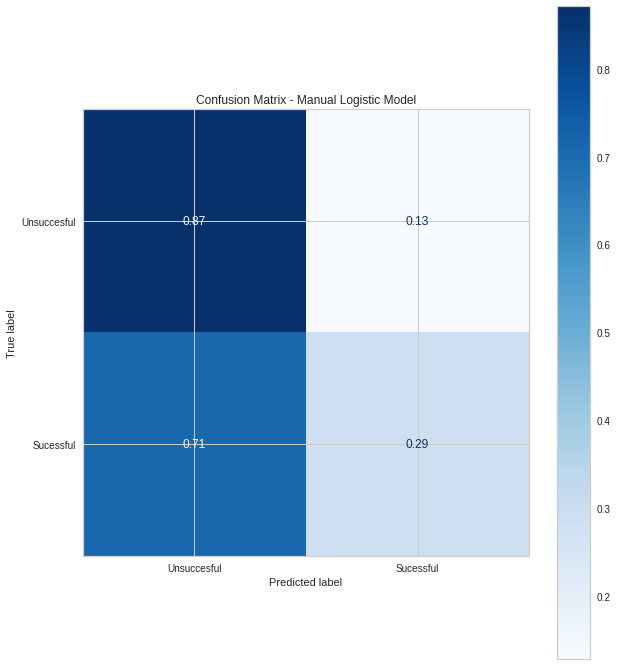

In [414]:
from sklearn.metrics import plot_confusion_matrix

log_matrix = plot_confusion_matrix(logit, X_val_manual, y_val_man_logreg,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix - Manual Logistic Model')
labels = ("Unsuccesful","Sucessful")
positions = (0, 1)
plt.xticks(positions,labels)
plt.yticks(positions,labels)
plt.show(log_matrix);

#### 2. Vectorized Logistic Regression Model

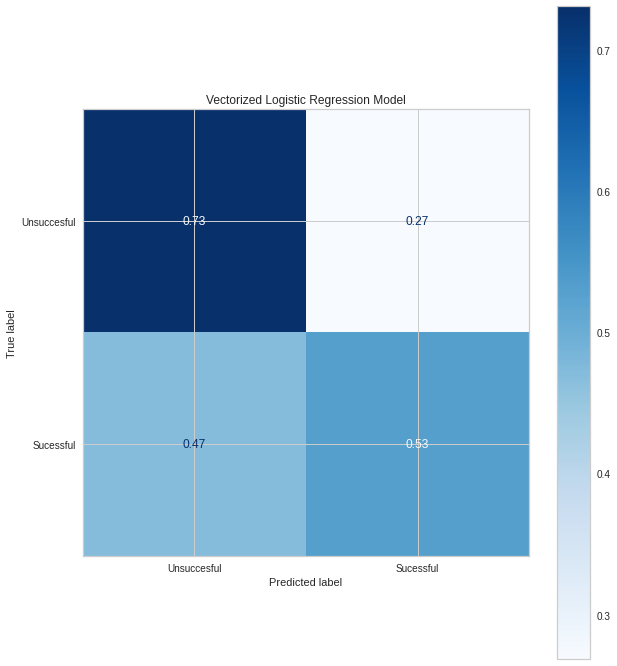

In [412]:
vectorized_log_matrix = plot_confusion_matrix(classifer, X_val_vector, y_val_vector,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Vectorized Logistic Regression Model')
labels = ("Unsuccesful","Sucessful")
positions = (0, 1)
plt.xticks(positions,labels)
plt.yticks(positions,labels)
plt.show(vectorized_log_matrix);


#### 3. TFIDF Model + Logistic Regression Model

Text(0.5, 1.0, 'TFIDF - Logistic Regression Model')

([<matplotlib.axis.XTick at 0x7f9dc08f6af0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9dc08f6970>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

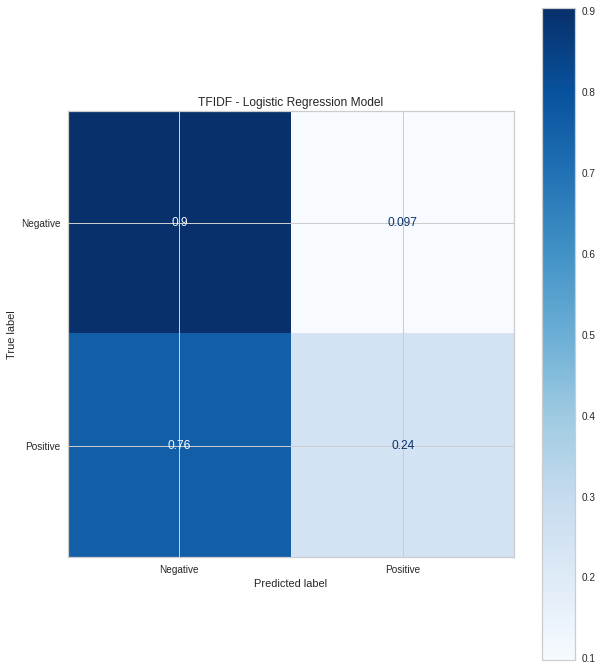

              precision    recall  f1-score   support

           0       0.63      0.90      0.74        93
           1       0.64      0.24      0.35        66

    accuracy                           0.63       159
   macro avg       0.63      0.57      0.55       159
weighted avg       0.63      0.63      0.58       159



In [409]:
conf_mat_tfidf_logreg= X_val_vectors.toarray()

tfidf_log_matrix = plot_confusion_matrix(lr_model, conf_mat_tfidf_logreg, t_val_TFIDF_logreg,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('TFIDF - Logistic Regression Model')
labels = ("Negative","Positive")
positions = (0, 1)
plt.xticks(positions,labels)
plt.yticks(positions,labels)
plt.show(tfidf_log_matrix);


lr_output = lr_model.predict(conf_mat_tfidf_logreg)
print(classification_report(t_val_TFIDF_logreg, lr_output))

#### 4. TFIDF + Random Forest Classifier

Text(0.5, 1.0, 'TFIDF - Random Forest Classifer')

([<matplotlib.axis.XTick at 0x7f9dc0862eb0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f9dc0875730>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

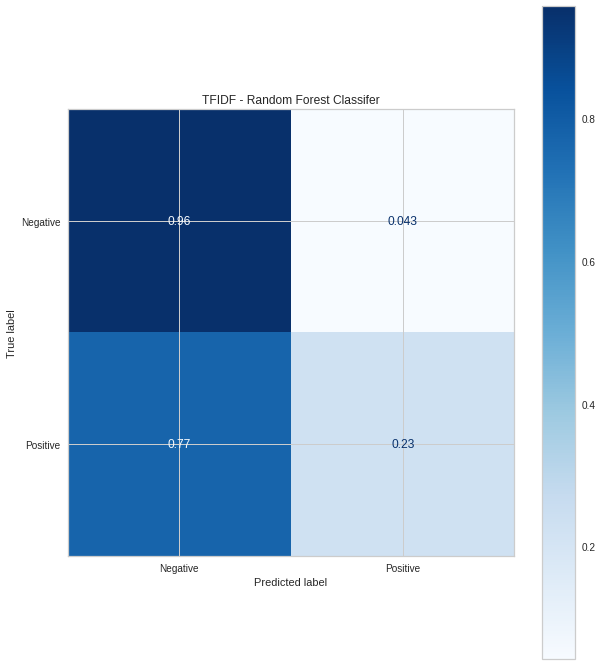

              precision    recall  f1-score   support

           0       0.63      0.90      0.74        93
           1       0.64      0.24      0.35        66

    accuracy                           0.63       159
   macro avg       0.63      0.57      0.55       159
weighted avg       0.63      0.63      0.58       159



In [410]:
tfidf_log_matrix = plot_confusion_matrix(rf_classifier, x_val_rf, y_val_rf,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('TFIDF - Random Forest Classifer')
labels = ("Negative","Positive")
positions = (0, 1)
plt.xticks(positions,labels)
plt.yticks(positions,labels)
plt.show(tfidf_log_matrix);


tfidf_log_output = lr_model.predict(x_val_rf)
print(classification_report(y_val_rf, tfidf_log_output))

#### 5. BI-LSTM Model

In [398]:
# Training the model for 10 epocs with batch size of 32 and 
# performing validation on 20% of the train data
model_lstm.fit(np.array(X_val_seq_lstm),np.array(y_train),epochs=10,batch_size=32,validation_split=0.2)
bi_lstm_predictions = model_lstm.predict(X_val_seq_lstm)

Epoch 1/10
4/4 [==============================] - 1s 374ms/step - loss: 1.7239 - accuracy: 0.4409 - val_loss: 0.6157 - val_accuracy: 0.7188
Epoch 2/10
4/4 [==============================] - 1s 333ms/step - loss: 0.8172 - accuracy: 0.6063 - val_loss: 0.6111 - val_accuracy: 0.7188
Epoch 3/10
4/4 [==============================] - 1s 343ms/step - loss: 0.6081 - accuracy: 0.6929 - val_loss: 0.4727 - val_accuracy: 0.8125
Epoch 4/10
4/4 [==============================] - 1s 337ms/step - loss: 0.5208 - accuracy: 0.8189 - val_loss: 0.5794 - val_accuracy: 0.7188
Epoch 5/10
4/4 [==============================] - 1s 344ms/step - loss: 0.4780 - accuracy: 0.8425 - val_loss: 0.5110 - val_accuracy: 0.7812
Epoch 6/10
4/4 [==============================] - 1s 341ms/step - loss: 0.4243 - accuracy: 0.8819 - val_loss: 0.5396 - val_accuracy: 0.7812
Epoch 7/10
4/4 [==============================] - 1s 337ms/step - loss: 0.3769 - accuracy: 0.8819 - val_loss: 0.5396 - val_accuracy: 0.7500
Epoch 8/10
4/4 [====

In [399]:
y_val_lstm = y_val_rf
# Loop to make predictions comparable to test set in order to make a confusion matrix and classification report

bi_lstm_output=[]
x=0
while x < 159:
    y=np.argmax(bi_lstm_predictions[x])
    x+=1
    bi_lstm_output.append(y)

In [400]:
# Get classification report for MLP
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
print(classification_report(y_val_lstm, bi_lstm_output))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        93
           1       0.00      0.00      0.00        66

    accuracy                           0.58       159
   macro avg       0.29      0.50      0.37       159
weighted avg       0.34      0.58      0.43       159



/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 6. Convolutional Neural Network

In [401]:
# Loop to make predictions comparable to test set in order to make a confusion matrix and classification report
cnn_predictions = model_cnn.predict(x_test_cnn)

cnn_output=[]
x=0
while x < 183:
    y=np.argmax(cnn_predictions[x])
    x+=1
    cnn_output.append(y)

In [402]:
# Get classification report for CNN
print(classification_report(y_test_cnn, cnn_output))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       103
           1       0.00      0.00      0.00        80

    accuracy                           0.56       183
   macro avg       0.28      0.50      0.36       183
weighted avg       0.32      0.56      0.41       183



#### 7. CNN For Glove

In [403]:
glove_predictions = model_glove.predict(x_test_glove)

# Loop to make predictions comparable to test set in order to make a confusion matrix and classification report
cnn_glove_output=[]
x=0
while x < 183:
    y=np.argmax(glove_predictions[x])
    x+=1
    cnn_glove_output.append(y)

In [404]:
# Get classification report for CNN
print(classification_report(y_test_glove, cnn_glove_output))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       103
           1       0.00      0.00      0.00        80

    accuracy                           0.56       183
   macro avg       0.28      0.50      0.36       183
weighted avg       0.32      0.56      0.41       183



We notice that overall, the models tend to obtain a high True Negative Rate but a low True Positive one. This indicates sentences with negative meanings more often are correctly predicted. The reason for this missclassification might be that positive comments in the vaccine context tend to be accompanied by sarcasm. Additioanlly, it is worth noting that the models using TFIDF vectorization obtained the highest accuracy with 0.63.

### 5.2. F1-Scores
<a id="F1-Scores"></a>

In [405]:
from sklearn.metrics import average_precision_score, f1_score, recall_score
from sklearn import metrics
# Storing the name of all classifiers in one list 

classifiers = [logit, classifer,lr_model,rf_classifier]

x_val = [X_val_manual, X_val_vector, conf_mat_tfidf_logreg, x_val_rf]
y_test = [y_val_man_logreg, y_val_vector, t_val_TFIDF_logreg, y_val_rf]
clf_names = ["Manual Logistic Regression", "Vectorized Logistic Regression", "TFIDF Model + Logistic Regression Model", "TFIDF + Random Forest Classifier"]

# Storing all the F1 scores for each model

classifiers_results_table = pd.DataFrame(columns=['Classifiers','F1-score'])

# Append all relevant metrics to a final table that summarizes the results
for i in range(len(classifiers)):
    cls = classifiers[i]
    cls_name = clf_names[i]
    y_pred = cls.predict(x_val[i])
    f1_score = metrics.f1_score(y_true=y_test[i], y_pred=y_pred, average='weighted')
    classifiers_results_table = classifiers_results_table.append({'Classifiers':cls_name,
                                        'F1-score':f1_score}, ignore_index=True)
    


# Calculating Metrics for the rfc_stacking

#y_pred = rfc_stacking.predict(stack_test)
#f1_score_stacked = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
#classifiers_results_table = classifiers_results_table.append({'Classifiers':"Stacked Model",
#                                        'F1-score':f1_score_stacked}, ignore_index=True)

classifiers_results_table.set_index("Classifiers", inplace=True)
classifiers_results_table.sort_values("F1-score", ascending=False).round(2)


# The reason why the F1-Score of some of the models is the same is beacuse they are incorrectly classifying in the test set the 'successful artists' instances, a larger test set would reveal different F1 Scores

,F1-score
Classifiers,
Vectorized Logistic Regression,0.64
TFIDF + Random Forest Classifier,0.59
Manual Logistic Regression,0.59
TFIDF Model + Logistic Regression Model,0.58


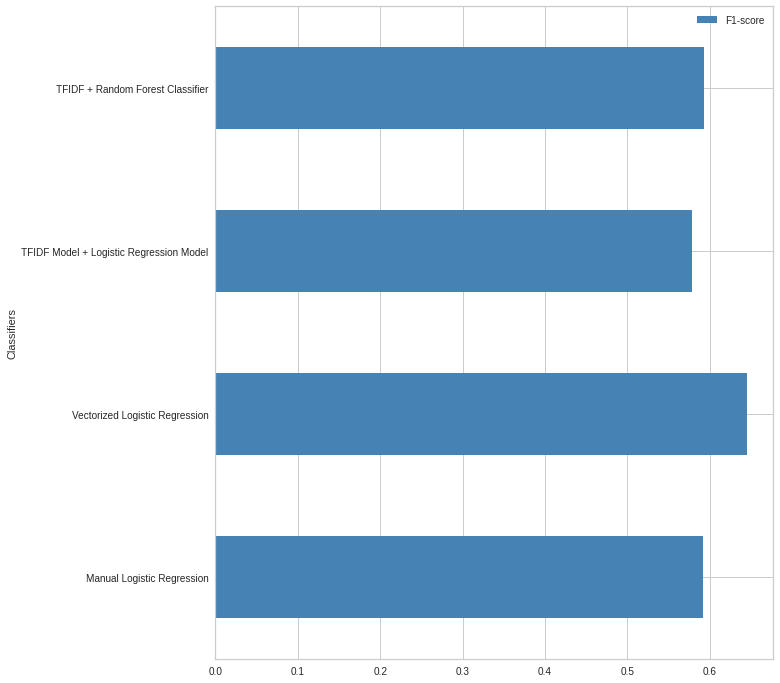

In [407]:
plt.rcParams["figure.figsize"] = [10, 12]
classifiers_results_table.plot(kind="barh", color='steelblue')

# FI CLASSIFIER'S RESULTS
plt.show();

The highest F1 score is obtained by the vectorized logistic regression, indicating an overall healthy balance for True positives and negatives.

### 5.3. Text Analysis
<a id="Text_Analysis"></a>

In [430]:
# Appending the predictions made to the 
pd.set_option('display.max_rows', 500)
comments_for_error_analysis = pd.DataFrame(x_val_comments_rf)
comments_for_error_analysis["TFIDF Random Forest Predictions"] = rf_classifier.predict(x_val_rf)
comments_for_error_analysis["True Predictions"] = y_val

comments_for_error_analysis.loc[418]
comments_for_error_analysis["comment_body"][418]



comment_body                       never felt pain vaccination seamless quick con...
TFIDF Random Forest Predictions                                                    0
True Predictions                                                                   1
Name: 418, dtype: object

'never felt pain vaccination seamless quick concerned didnt get dose'

Above we see a specific error made by the model where it incorrectly predicts a sentence as a negative output. The patient talks about not feeling pain throughout the vaccination process which can be interpreted positively. However, the model might be categorizing the phrase as negative given the inclusion of words such as 'pain' or 'concerned'. Thus, further training on the contextual words from the phrase could help it improve its performance.

## 6. Conclusion
### 6.1. Limitations
<a id="Limitations"></a>

Although we have explored a diverse amount of models, there are a few limitations to our research. First was the learning curve, since it was our first time creating the whole dataset from scratch and we hit a few roadblocks on the way. In the early process of web-scraping, we were not able to get data from the desired time frame as well as get the data using multiple keywords. Instead, we ended up focusing on the most relevant posts in each of the four categories and scraped the comments from there. If we were to further pursue this project we would have chosen the time frame between November 2020 - January 2021 as that was right before the first COVID-19 vaccinated patient appeared, due to this the discussion of how effective the vaccine may be and whether individuals would get vaccinated was a trending topic. The following limitation was the size of the dataset. Because of the time constraint, we decided to work with 1,000 rows, but we understand that if the scale was larger, the training of the models and therefore the accuracy would possibly be higher. For this, we would scrape a larger amount of data which would allow for the creation of larger training and testing datasets.

### 6.2. Conclusion
<a id="Conclusion"></a>

Overall, we note good performance on the Random Forests + TFIDF model, achieving over 63% accuracy. However, in general terms the rest of the models achieved low performance. Considering the human baseline is 70%, it can be argued the best of these models is not too far from this threshold. Additionally, the nature of the comments that were chosen arguably, makes prediction by the models more difficult. For example, sarcasm is used across all forums as well as slang words. On the other hand, it can be inferred that based on the sampled comments, the majority of the population is feeling discomfort towards the vaccine in general. Hence, governments and pharmaceutical companies should be aware of the populations' general feeling to adapt their vaccination policies accordingly. 

To conclude, the models presented in this paper can be used as an initial benchmark from where governments and corporations can build up more complex and accurate sentiment classification algorithms. If these algorithms reach a high accuracy score, they could play an essential role in shaping govermnet policy and informing business decisions for industries which are dependent on future vaccine uptake.

### 6.3. References
<a id="References"></a>

1.	Department of Health & Social Care, 2021. https://www.gov.uk/government/publications/covid-19-vaccination-uptake-plan/uk-covid-19-vaccine-uptake-plan.
2.	Ismiguzel, I., 2020. Applying Text Classification using Logistic Regression: A comparison between BoW and Tf-Idf. [online] Medium. Available at: <https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640> [Accessed 28 February 2021].
3.	Kerrigan, G., Slack, D. and Tuyls, J., 2020. Differentially Private Language Models Benefit from Public Pre-training. [online] Arxiv.org. Available at: <https://arxiv.org/pdf/2009.05886.pdf> [Accessed 28 February 2021].
4.	Lee, I., 2020. Data Labeling For Natural Language Processing. [online] TOPBOTIvan LeeS. Available at: <https://www.topbots.com/data-labeling-for-natural-language-processing/> [Accessed 28 February 2021].
5.	Porreca, A., Scozzari, F. and Di Nicola, M., 2020. Using text mining and sentiment analysis to analyse YouTube Italian videos concerning vaccination. BMC Public Health, 20(1).
6.	Razai, M., Osama, T., McKechnie, D. and Majeed, A., 2021. Covid-19 vaccine hesitancy among ethnic minority groups. BMJ, p.n513.
7.	Selvaraj, N., 2020. A Beginner’s Guide to Sentiment Analysis with Python. [online] Medium. Available at: <https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6> [Accessed 28 February 2021].
8.	Tran, J., 2020. NLP Sentiment Analysis for beginners.. [online] Medium. Available at: <https://towardsdatascience.com/nlp-sentiment-analysis-for-beginners-e7897f976897> [Accessed 28 February 2021].
9.	US National Library of Medicine National Institutes of Health, 2021. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7277574/.